<h1><center>A thorough examination of the JSEC loyalty program.</center></h1>

## I. Background
### I. 1. Introduction
Loyalty programs are an excellent approach to persuade customers to continue shopping at or using the services of a company affiliated with the program.

We are tasked with analyzing data provided by the JSEC enterprise in order to assess their 6 month transactional data and parse critical indicators in order to comprehend the transactional data.

### I. 2. Objectives
In this study, I sought to investigate the following customers, as stated:
* Repeat customers who made purchases both this month and last month.
* Customers who are inactive and have not made any purchases this month but had a history of purchase.
* Engaged customers who regularly made purchases every month since their first purchase.

### I. 3. Data 
The provided data consists of a single array of objects that contain the customer's address, birthday, email, name, sex, username, transaction items, transaction price, and transaction date.

In [59]:
dataset_url = "https://github.com/juliusrafaelco/ad-hoc-transaction-files/raw/main/transaction-data-adhoc-analysis.json" # The dataset is uploaded here.

## II. Data Gathering
### II. 1. Obtaining Requirements
The dataset is posted to Github for portability, which permits downloading through a direct link; the code below gets or downloads the file from the aforementioned hosting site.

In [60]:
import requests
dataset_content = requests.get(dataset_url).text # Downloads the dataset to dataset_content

### II. 2. Checking the Downloaded Dataset
The code below validates the dataset by parsing it to JSON.

In [61]:
import json

raw_transaction_list = None

try:
  raw_transaction_list = json.loads(dataset_content)
  print("✔️ Dataset is valid and loaded.")
except ValueError as e:
  print("❌ Dataset is invalid, cannot be parsed to JSON.")

✔️ Dataset is valid and loaded.


## III. Cleanup and Data Processing
### III. 1. Expanding of Data
As previously stated, the dataset should have a maximum of one transaction item per row; however, after evaluating the dataset, the ``transaction_items`` field of each transaction appears to follow the format of **[item name], (x[item count])**.

Here is an example of multiple transaction items in a single field:

> "transaction_items": "Exotic Extras,Kimchi and Seaweed,(x2);Candy City,Gummy Worms,(x3);Exotic Extras,Beef Chicharon,(x3)"

When there is another transaction item after the item count, a trailing colon occurs. To clear this up, we'll add a new field to the transaction object ``item_quantity`` that contains the number of items purchased, as we'll be creating a transaction object for each transaction item. The code below does said instructions.

In [62]:
from datetime import datetime
import re # Import regex for filtering string data.

cleaned_transaction_list = [] # Initialize a list that we'll append the cleaned data on.

for i in raw_transaction_list:
  transaction_items = i["transaction_items"].split(';')
  for j in transaction_items:
    current_transaction = i.copy()
    product_line = j.split(',')
    product_type = product_line[0]
    product_name = product_line[1]
    product_quantity = int(''.join(re.findall("\d+", product_line[2])))
    current_transaction["product_type"] = product_type
    current_transaction["transaction_items"] = product_name
    current_transaction["item_quantity"] = product_quantity
    current_transaction["transaction_date"] = datetime.strptime(current_transaction["transaction_date"], "%Y/%m/%d")
    cleaned_transaction_list.append(current_transaction)

print("✔️ Data expanded, cleaned transaction objects: " + str(len(cleaned_transaction_list)) +
      ", original transaction objects count: " + str(len(raw_transaction_list)))

✔️ Data expanded, cleaned transaction objects: 166119, original transaction objects count: 83036


### III. 2. Creation of Dataframe
First we need to import the required libraries for handling the data. The code below does it.

In [63]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The dataframe for the for the entire dataset is created and outputted using the code below.

In [64]:
dataframe = pd.DataFrame(data=cleaned_transaction_list)
dataframe # Print the dataframe.

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,product_type,item_quantity
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,Beef Chicharon,5196,2022-01-12,Exotic Extras,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Beef Chicharon,12056,2022-01-12,Exotic Extras,3
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Nutrional Milk,12056,2022-01-12,HealthyKid 3+,4
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Orange Beans,12056,2022-01-12,Candy City,1
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Gummy Vitamins,5500,2022-01-08,HealthyKid 3+,3
...,...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,Nutrional Milk,4280,2022-06-09,HealthyKid 3+,2
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,Gummy Worms,4280,2022-06-09,Candy City,2
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,Nutrional Milk,2639,2022-06-03,HealthyKid 3+,1
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,Gummy Worms,2639,2022-06-03,Candy City,3


The code below generates a distinct list for repeaters based on their purchase of the most recent month in the dataset and the month before it. In other words, clients who made transactions both in June and May.

In [65]:
last_transaction = max(data["transaction_date"] for data in cleaned_transaction_list) # Get the latest month in the dataset first.

newest_transactional_month = last_transaction.month
the_month_before = newest_transactional_month - 1

transactions_of_current_month = dataframe[dataframe["transaction_date"].dt.month == newest_transactional_month] # Get the transactions for the current month.
transactions_of_last_month = dataframe[dataframe["transaction_date"].dt.month == the_month_before]
repeaters_dataframe = transactions_of_current_month[transactions_of_current_month["username"].isin(transactions_of_last_month["username"])]

The code below creates a dataframe for inactive customers.

In [66]:
transactions_not_of_the_current_month = dataframe[~dataframe["username"].isin(transactions_of_current_month["username"])]

The code below creates a dataframe for engaged customers.

In [67]:
sorted_df = dataframe.sort_values(by=["transaction_date"])

#print(sorted_df["transaction_date"].dtypes)
#print(sorted_df["transaction_date"].diff())

                                                                                              # .diff() timedelta64 which has months but series
                                                                                                              # .dt TimedeltaProperties doesnt have months
engaged_transactions = sorted_df.groupby(["username"]).filter(lambda x: (x["transaction_date"].diff().apply(lambda y: y / np.timedelta64(1, "M"))).all())

Sales analysis dataframes are generated via the codes below.

In [68]:
from datetime import datetime, timedelta
import calendar, collections

items_and_date = dataframe[["transaction_items", "transaction_date", "item_quantity"]]
items_and_date["transaction_date"] = pd.PeriodIndex(items_and_date["transaction_date"], freq="M")
items_and_date["period_total"] = items_and_date.groupby(["transaction_items", "transaction_date"])["item_quantity"].transform('sum')
items_and_date = items_and_date.drop_duplicates(subset=["transaction_items", "transaction_date"])
dates = items_and_date["transaction_date"].drop_duplicates().to_list()
product = items_and_date["transaction_items"].drop_duplicates().to_list()

def nested_dict():
    return collections.defaultdict(nested_dict)

cleaned_products = nested_dict()

for i in dates:
  date_exp = nested_dict()
  for index, row in items_and_date.iterrows():
    if row["transaction_date"] == i:
      if not date_exp[row["transaction_items"]]:
        date_exp[row["transaction_items"]] = 0
      date_exp[row["transaction_items"]] += abs(row["period_total"])
  cleaned_products[i] = date_exp
transposed_items_and_date = pd.DataFrame(cleaned_products)

# Now create monthly value of each product dataframe.
items_and_date = dataframe[["transaction_items", "transaction_date", "transaction_value"]]
items_and_date["transaction_date"] = pd.PeriodIndex(items_and_date["transaction_date"], freq="M")
items_and_date["period_total"] = items_and_date.groupby(["transaction_items", "transaction_date"])["transaction_value"].transform('sum')
items_and_date = items_and_date.drop_duplicates(subset=["transaction_items", "transaction_date"])

product_values = nested_dict()

for i in dates:
  date_exp = nested_dict()
  for index, row in items_and_date.iterrows():
    if row["transaction_date"] == i:
      if not date_exp[row["transaction_items"]]:
        date_exp[row["transaction_items"]] = 0
      date_exp[row["transaction_items"]] += abs(row["period_total"])

  product_values[i] = date_exp

product_values_dataframe = pd.DataFrame(product_values)

# Get count per item type
items_and_date = dataframe[["product_type", "transaction_date", "item_quantity"]]
items_and_date["transaction_date"] = pd.PeriodIndex(items_and_date["transaction_date"], freq="M")
items_and_date["period_total"] = items_and_date.groupby(["product_type", "transaction_date"])["item_quantity"].transform('sum')
items_and_date = items_and_date.drop_duplicates(subset=["product_type", "transaction_date"])

item_type_val = nested_dict()

for i in dates:
  date_exp = nested_dict()
  for index, row in items_and_date.iterrows():
    if row["transaction_date"] == i:
      if not date_exp[row["product_type"]]:
        date_exp[row["product_type"]] = 0
      date_exp[row["product_type"]] += abs(row["period_total"])

  product_values[i] = date_exp

count_per_type = pd.DataFrame(product_values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

The code below creates dataframes for the overall data of the customers.

In [69]:
engaged_transactions["count"] = 1
engaged_transactions["transaction_date"] = pd.PeriodIndex(engaged_transactions["transaction_date"], freq="M")
engaged_transactions["period_total"] = engaged_transactions.groupby(["transaction_date"], as_index=False)["count"].transform('sum')
engaged_transactions_period = engaged_transactions.drop_duplicates(subset=["transaction_date"])
transactions_per_month = engaged_transactions_period[["transaction_date", "period_total"]]
transactions_per_month = transactions_per_month.set_index("transaction_date")
transactions_per_month = transactions_per_month.rename(columns = {"period_total" : "Enaged Customers"})

transactions_not_of_the_current_month["count"] = 1
transactions_not_of_the_current_month["transaction_date"] = pd.PeriodIndex(transactions_not_of_the_current_month["transaction_date"], freq="M")
transactions_not_of_the_current_month["period_total"] = transactions_not_of_the_current_month.groupby(["transaction_date"], as_index=False)["count"].transform('sum')
transactions_not_of_the_current_month_period = transactions_not_of_the_current_month.drop_duplicates(subset=["transaction_date"])
transactions_not_of_the_current_month_period = transactions_not_of_the_current_month_period.set_index("transaction_date")

new_transactions_per_month = transactions_per_month.join(transactions_not_of_the_current_month_period["period_total"])
new_transactions_per_month = new_transactions_per_month.fillna(0)
new_transactions_per_month["period_total"] = new_transactions_per_month["period_total"].astype(int)
new_transactions_per_month = new_transactions_per_month.rename(columns = {"period_total" : "Inactive Customers"})

# Add repeaters_dataframe
repeaters_dataframe["count"] = 1
repeaters_dataframe["transaction_date"] = pd.PeriodIndex(repeaters_dataframe["transaction_date"], freq="M")
repeaters_dataframe["period_total"] = repeaters_dataframe.groupby(["transaction_date"], as_index=False)["count"].transform('sum')
repeaters_dataframe_period = repeaters_dataframe.drop_duplicates(subset=["transaction_date"])
repeaters_dataframe_period = repeaters_dataframe_period.set_index("transaction_date")

new_transactions_per_month = new_transactions_per_month.join(repeaters_dataframe_period["period_total"])
new_transactions_per_month = new_transactions_per_month.fillna(0)
new_transactions_per_month["period_total"] = new_transactions_per_month["period_total"].astype(int)
new_transactions_per_month = new_transactions_per_month.rename(columns = {"period_total" : "Repeating Customers"})
new_transactions_per_month = new_transactions_per_month.fillna("No Data")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

## IV. Data Analysis
### IV. 1. Repeaters
Repeaters are new clients who have the potential to become involved customers. The code below prints a table for the repeaters.

In [70]:
repeaters_dataframe

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,product_type,item_quantity,count,period_total
138423,"958 Henry Extension\nMarthamouth, WV 78781",2012/03/20,john21@gmail.com,Alexander Davis,M,esmith,Kimchi and Seaweed,3196,2022-06,Exotic Extras,4,1,22005
138424,USS Ware\nFPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,Gummy Vitamins,8696,2022-06,HealthyKid 3+,1,1,22005
138425,USS Ware\nFPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,Yummy Vegetables,8696,2022-06,HealthyKid 3+,4,1,22005
138426,USS Ware\nFPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,Beef Chicharon,8696,2022-06,Exotic Extras,4,1,22005
138427,USS Ware\nFPO AA 66840,1982/12/06,pestrada@gmail.com,Michael Lowe,M,richardhays,Kimchi and Seaweed,7568,2022-06,Exotic Extras,2,1,22005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166111,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,Orange Beans,3396,2022-06,Candy City,4,1,22005
166112,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,Gummy Worms,3396,2022-06,Candy City,4,1,22005
166113,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,Yummy Vegetables,3396,2022-06,HealthyKid 3+,4,1,22005
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,Nutrional Milk,4280,2022-06,HealthyKid 3+,2,1,22005


Now it is important to understand what makes consumers return for more; it might be a specific product or anything; the code below outputs which goods are purchased by repeat customers.

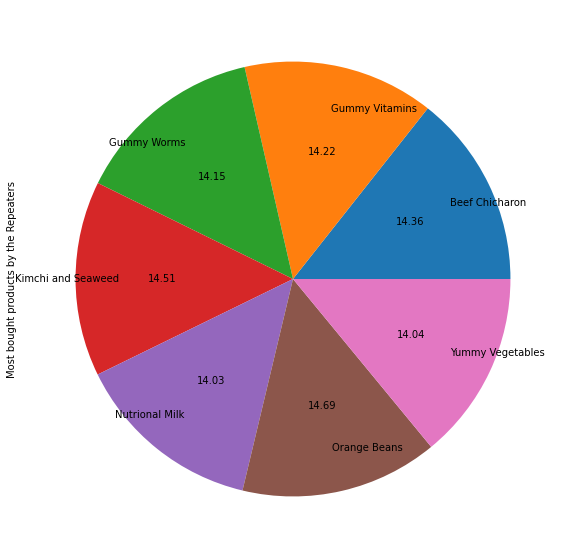

In [71]:
repeaters_purchases = repeaters_dataframe[["transaction_items", "item_quantity"]]
repeaters_purchases = repeaters_purchases.sort_values(by="item_quantity")
repeaters_purchases = repeaters_purchases.groupby('transaction_items')['item_quantity'].sum()
repeaters_purchases_plot = repeaters_purchases.plot.pie(y='item_quantity', figsize=(10, 10), ylabel='Most bought products by the Repeaters', labeldistance=0.8, autopct='%.2f')
repeaters_purchases_plot

### IV. 2. Inactive
Customers who have not made any purchases this month are considered inactive; the code below displays a table of all their transactions.

In [72]:
transactions_not_of_the_current_month = transactions_not_of_the_current_month.sort_values(by="transaction_date")
transactions_not_of_the_current_month

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,product_type,item_quantity,count,period_total
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,Beef Chicharon,12056,2022-01,Exotic Extras,3,1,5648
17919,"43760 Weaver Spring Suite 641\nWilliamville, C...",1928/05/30,wdonaldson@hotmail.com,Brian Riley,M,webbtodd,Yummy Vegetables,7650,2022-01,HealthyKid 3+,3,1,5648
17918,"43760 Weaver Spring Suite 641\nWilliamville, C...",1928/05/30,wdonaldson@hotmail.com,Brian Riley,M,webbtodd,Gummy Worms,7650,2022-01,Candy City,1,1,5648
17917,"7037 Huffman Burg\nLake Nicolasmouth, IL 15432",1989/06/19,lisakeith@gmail.com,Alexandra Crawford,F,erica41,Nutrional Milk,7960,2022-01,HealthyKid 3+,4,1,5648
17916,"7037 Huffman Burg\nLake Nicolasmouth, IL 15432",1989/06/19,lisakeith@gmail.com,Alexandra Crawford,F,erica41,Beef Chicharon,6196,2022-01,Exotic Extras,3,1,5648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120236,2955 Novak Lights Suite 175\nWest Gregoryshire...,2012/08/08,erika54@yahoo.com,Diana Williams,F,amy89,Yummy Vegetables,6196,2022-05,HealthyKid 3+,2,1,5615
120235,2955 Novak Lights Suite 175\nWest Gregoryshire...,2012/08/08,erika54@yahoo.com,Diana Williams,F,amy89,Beef Chicharon,6196,2022-05,Exotic Extras,4,1,5615
120231,"79543 King Road Suite 949\nWebbside, RI 25281",1932/02/27,whitekatie@yahoo.com,Alexander Cortez,M,priceshelia,Nutrional Milk,3980,2022-05,HealthyKid 3+,2,1,5615
120268,"04074 Brandi Forks Suite 607\nThomasstad, NJ 5...",1990/02/05,amandajackson@yahoo.com,Angela Stevens,F,jacobsamy,Gummy Vitamins,5397,2022-05,HealthyKid 3+,2,1,5615


### IV. 3. Engaged
The code below displays which clients have had a buying streak every month from their initial purchase.


In [73]:
engaged_transactions

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,product_type,item_quantity,count,period_total
19315,"132 Tyler Course\nSouth Lance, IL 96108",1946/04/25,paula44@gmail.com,Stacey Wright,F,newmanlisa,Yummy Vegetables,1000,2022-01,HealthyKid 3+,2,1,12
16694,"83600 Reed Place\nLake Darren, NH 38376",1977/10/28,sarahthomas@gmail.com,Catherine Schneider,F,dawn75,Kimchi and Seaweed,2397,2022-01,Exotic Extras,3,1,12
18832,"474 Lara Mountain\nMariahaven, CO 15184",1915/05/25,david44@hotmail.com,James Simon,M,qdavid,Gummy Vitamins,4500,2022-01,HealthyKid 3+,3,1,12
10562,"70963 Michelle Views\nEast Seanfort, OK 35714",1976/03/20,bjones@hotmail.com,Dawn Miller,F,keith57,Nutrional Milk,3980,2022-01,HealthyKid 3+,2,1,12
15416,"842 Price Mills\nRichfurt, MN 93056",1938/12/20,barry75@hotmail.com,Leah Holmes,F,kstanton,Gummy Worms,450,2022-01,Candy City,3,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164017,"50261 Manning Gateway\nNew Kimberly, VT 23909",1957/02/19,rcarr@yahoo.com,Kyle Lewis,M,stephanierobbins,Kimchi and Seaweed,3196,2022-06,Exotic Extras,4,1,9
157542,"474 Lara Mountain\nMariahaven, CO 15184",1915/05/25,david44@hotmail.com,James Simon,M,qdavid,Kimchi and Seaweed,2397,2022-06,Exotic Extras,3,1,9
149008,"70963 Michelle Views\nEast Seanfort, OK 35714",1976/03/20,bjones@hotmail.com,Dawn Miller,F,keith57,Beef Chicharon,5196,2022-06,Exotic Extras,4,1,9
156347,"73342 David Squares\nLake Debbie, MA 04084",1966/12/11,davidsmith@hotmail.com,Bailey Castillo,F,blittle,Gummy Worms,450,2022-06,Candy City,3,1,9


### IV. 4. General Customer Data
The code below displays the total number of repeaters, engaged, inactive, and monthly transactions.


In [74]:

# transactions_not_of_the_current_month_period
# transactions_per_month
new_transactions_per_month

,Enaged Customers,Inactive Customers,Repeating Customers
transaction_date,,,
2022-01,12,5648,0
2022-02,14,5741,0
2022-03,15,5754,0
2022-04,10,5591,0
2022-05,10,5615,0
2022-06,9,0,22005


### IV. 5. Sales Data
The sales values of goods in the dataset below are evaluated. This indicates how many times a product is purchased each month.

In [75]:
transposed_items_and_date

,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
Beef Chicharon,9665,10001,9816,9890,10028,9902
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Yummy Vegetables,9959,10256,9896,9861,9735,9722
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104


The code below demonstrates how the monthly value of each product is calculated.

In [76]:
product_values_dataframe

,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
Beef Chicharon,23537471,24475313,24208956,24298117,24425935,24466423
Nutrional Milk,28791619,28892984,29457128,29493222,29736940,28967253
Orange Beans,15145758,15448301,15411277,15528842,15560870,15993046
Gummy Vitamins,24928516,25721397,26336301,25881223,25876852,25995105
Yummy Vegetables,18014304,18403632,18050205,17791119,18041692,17427607
Gummy Worms,14451956,15439312,15391597,15662068,15121334,14979166
Kimchi and Seaweed,20024684,20334018,20418772,20402864,20178178,21109736


The code below displays a table detailing the product type and its monthly purchases.

In [77]:
count_per_type

,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
Exotic Extras,19341,19950,19783,19811,19801,20006
HealthyKid 3+,29367,29927,29917,29489,29564,29469
Candy City,19333,20033,19597,19957,19765,20040
